In [2]:
import pandas as pd
df = pd.read_csv("/Users/carriemagee/Personal_Project/Goodreads_Personal_Project/goodreads_data.csv")

In [3]:
print(df.columns)
list(df.columns)
df.describe

Index(['Book Id', 'Title', 'Author', 'Author l-f', 'Additional Authors',
       'ISBN', 'ISBN13', 'My Rating', 'Average Rating', 'Publisher', 'Binding',
       'Number of Pages', 'Year Published', 'Original Publication Year',
       'Date Read', 'Date Added', 'Bookshelves', 'Bookshelves with positions',
       'Exclusive Shelf', 'My Review', 'Spoiler', 'Private Notes',
       'Read Count', 'Owned Copies'],
      dtype='object')


<bound method NDFrame.describe of       Book Id                                              Title  \
0    62292422                                    Psyche and Eros   
1    50607466          The Henna Artist (The Jaipur Trilogy, #1)   
2    63057457                               Girl, Goddess, Queen   
3    61756732              Queen of Shadows (Throne of Glass #4)   
4       23522                                          Mythology   
..        ...                                                ...   
120  59344312                                             Verity   
121  50659467  A Court of Thorns and Roses (A Court of Thorns...   
122  60393672            It Starts with Us (It Ends with Us, #2)   
123  50659468  A Court of Mist and Fury (A Court of Thorns an...   
124      6708  The Power of Now: A Guide to Spiritual Enlight...   

             Author       Author l-f Additional Authors           ISBN  \
0     Luna McNamara   McNamara, Luna                NaN  ="0063295075"   
1

In [4]:
#Filtering dataset to only include books that I have read
read_books = df[df['Date Read'].notnull()]
data = read_books.loc[:, ['Book Id','Title','Author','My Rating','Average Rating',
                          'Number of Pages','Year Published','Original Publication Year',
                          'Date Read','Date Added','Bookshelves', 'My Review']]


In [5]:
print(data["Year Published"].isnull)
# Assuming df is your DataFrame
null_rows = df[df.isnull().any(axis=1)]

print(null_rows)

<bound method Series.isnull of 2      2024
3      2023
18     2019
20     2023
22     2023
23     2023
25     2023
29     2023
31     2022
34     2022
35     2024
37     2018
38     2021
39     2012
40     2023
43     2024
45     2021
46     2022
47     2021
58     2021
62     2020
64     2022
65     2018
67     2014
68     2020
75     2020
76     2018
78     2022
79     2024
81     2023
82     2023
84     2022
85     2021
86     2023
90     2023
93     2023
94     2020
95     2022
97     2019
99     2023
106    2022
108    2023
109    2023
112    2020
113    2021
115    2020
121    2020
123    2020
Name: Year Published, dtype: int64>
      Book Id                                              Title  \
0    62292422                                    Psyche and Eros   
1    50607466          The Henna Artist (The Jaipur Trilogy, #1)   
2    63057457                               Girl, Goddess, Queen   
3    61756732              Queen of Shadows (Throne of Glass #4)   
4       23522    

In [6]:
#changing data types
import numpy as np
print(data.dtypes)
data = data[np.isfinite(data['Original Publication Year'])] 
convert_dtypes = {"Book Id": int, "Title": str, 
                  "Author": str, "My Rating": int,
                  "Average Rating": float, "Number of Pages": int,
                  "Year Published": int, "Original Publication Year": int,
                  "Date Read" : object, "Date Added" : object,
                  "Bookshelves":object, "My Review":object}

df = data.astype(convert_dtypes)
print(df.dtypes)

Book Id                        int64
Title                         object
Author                        object
My Rating                      int64
Average Rating               float64
Number of Pages                int64
Year Published                 int64
Original Publication Year    float64
Date Read                     object
Date Added                    object
Bookshelves                   object
My Review                     object
dtype: object
Book Id                        int64
Title                         object
Author                        object
My Rating                      int64
Average Rating               float64
Number of Pages                int64
Year Published                 int64
Original Publication Year      int64
Date Read                     object
Date Added                    object
Bookshelves                   object
My Review                     object
dtype: object


In [7]:
#changing Dates to datetime 
df['Date Read'] = pd.to_datetime(df['Date Read'])
df['Date Added'] = pd.to_datetime(df['Date Added'])

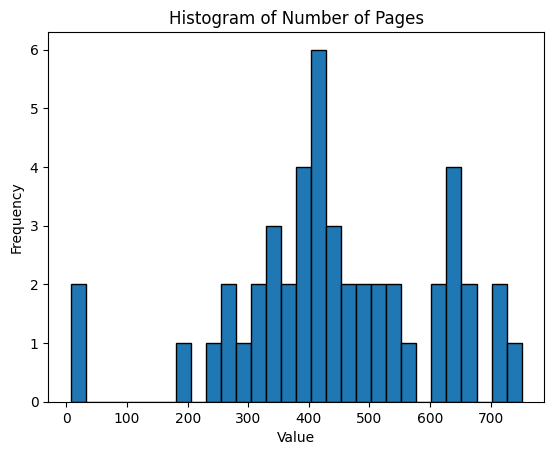

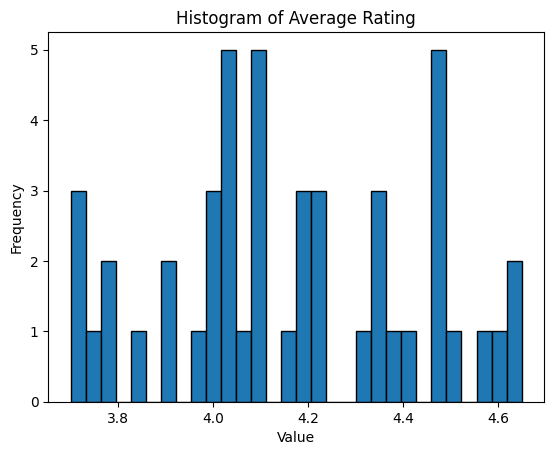

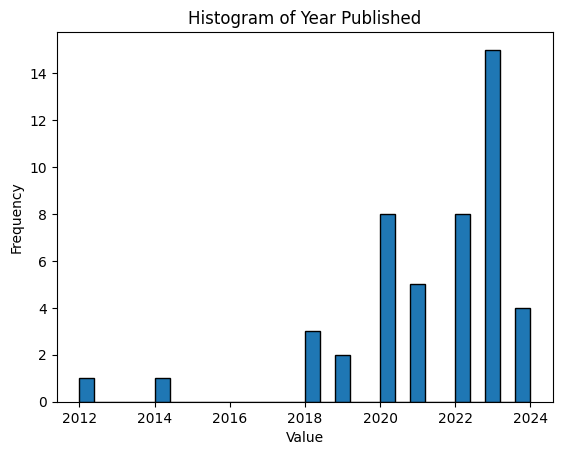

In [8]:
#CHECKING DISTRIBUTION OF FEATURES
import matplotlib.pyplot as plt

plt.hist(df['Number of Pages'], bins=30, edgecolor='black')
plt.title('Histogram of Number of Pages')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

plt.hist(df['Average Rating'], bins=30, edgecolor='black')
plt.title('Histogram of Average Rating')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

plt.hist(df['Year Published'], bins=30, edgecolor='black')
plt.title('Histogram of Year Published')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()





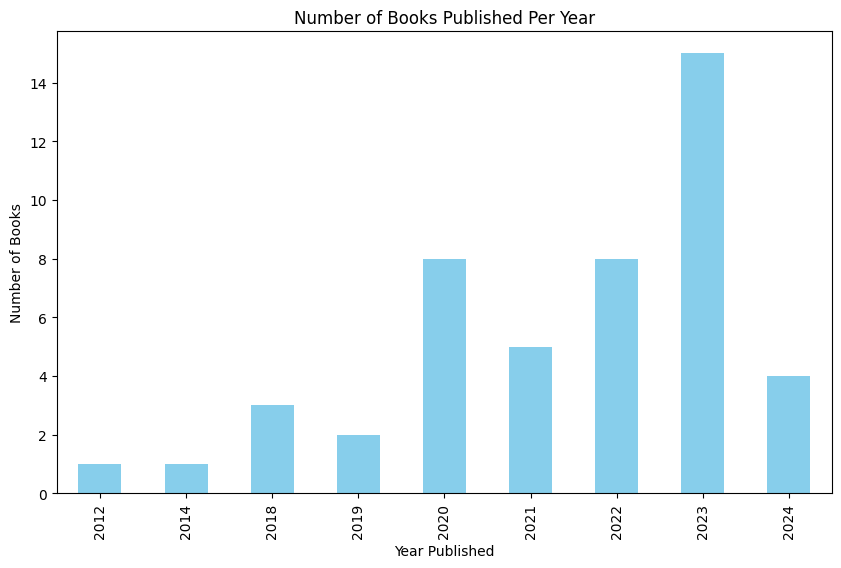

In [9]:
import matplotlib.pyplot as plt
books_per_year = df.groupby('Year Published').size()
# Plotting
plt.figure(figsize=(10, 6))
books_per_year.plot(kind='bar', color='skyblue')

# Adding titles and labels
plt.title('Number of Books Published Per Year')
plt.xlabel('Year Published')
plt.ylabel('Number of Books')

# Show the plot
plt.show()

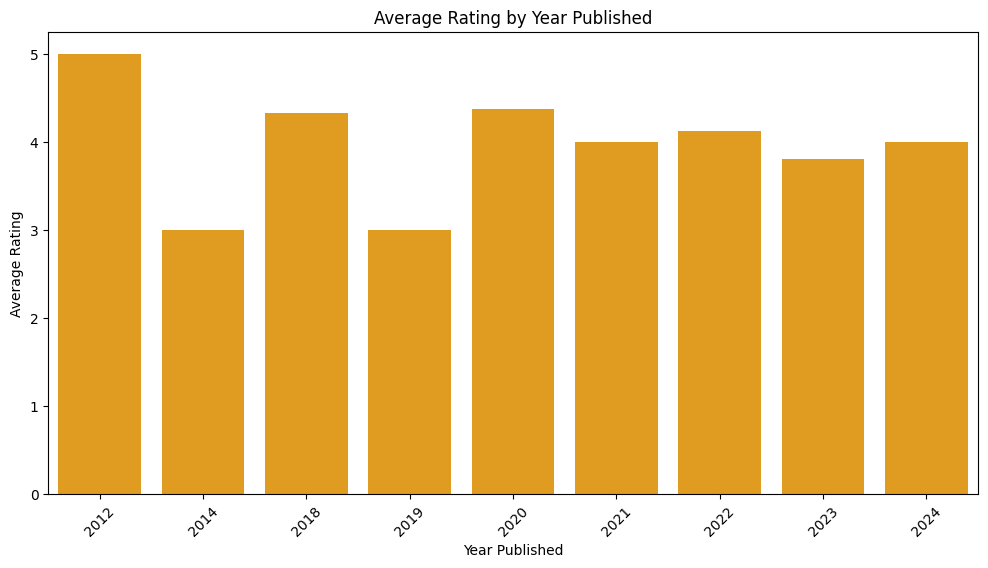

In [10]:
#Bar plot for avg My Rating per year
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the average rating per year
avg_rating_per_year = df.groupby('Year Published')['My Rating'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Year Published', y='My Rating', data=avg_rating_per_year, color="orange")

# Adding titles and labels
plt.title('Average Rating by Year Published')
plt.xlabel('Year Published')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)  # Rotate x labels if needed for better readability

# Show the plot
plt.show()

                 Average Rating  Number of Pages  My Rating
Average Rating         1.000000         0.414109   0.596968
Number of Pages        0.414109         1.000000   0.278614
My Rating              0.596968         0.278614   1.000000


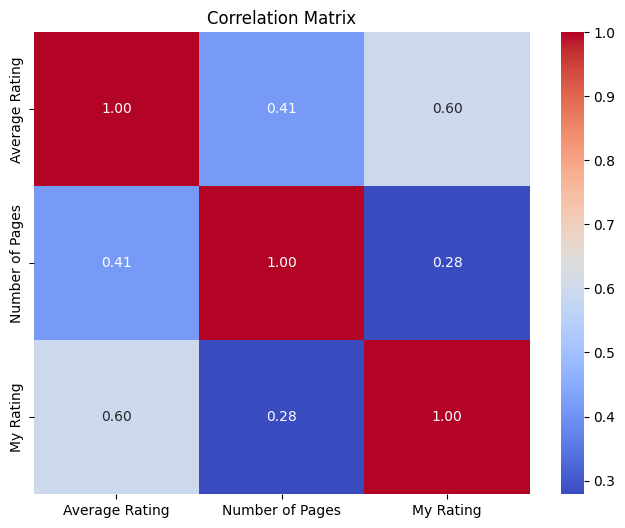

In [11]:
# Calculate the correlation matrix
corr_matrix = df[['Average Rating', 'Number of Pages', 'My Rating']].corr()
print(corr_matrix)

import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [12]:
#performing a Pearson Correlation Hypothesis Test bw Avg Rating and My Rating
import scipy.stats as stats

corr, p_value = stats.pearsonr(df['Average Rating'], df['My Rating'])
print(f'Pearson Correlation: {corr}')
print(f'p-value: {p_value}')

Pearson Correlation: 0.5969682168860112
p-value: 9.460018159240185e-06


In [13]:
#performing a Pearson Correlation Hypothesis Test bw # Pages and My Rating
corr, p_value = stats.pearsonr(df['Number of Pages'], df['My Rating'])
print(f'Pearson Correlation: {corr}')
print(f'p-value: {p_value}')

Pearson Correlation: 0.2786137823748409
p-value: 0.05790896000797451


In [14]:
#Normalized my rating by author and adde new column for EDA
df['Avg Rating by Author'] = df.groupby('Author')['My Rating'].transform('mean')

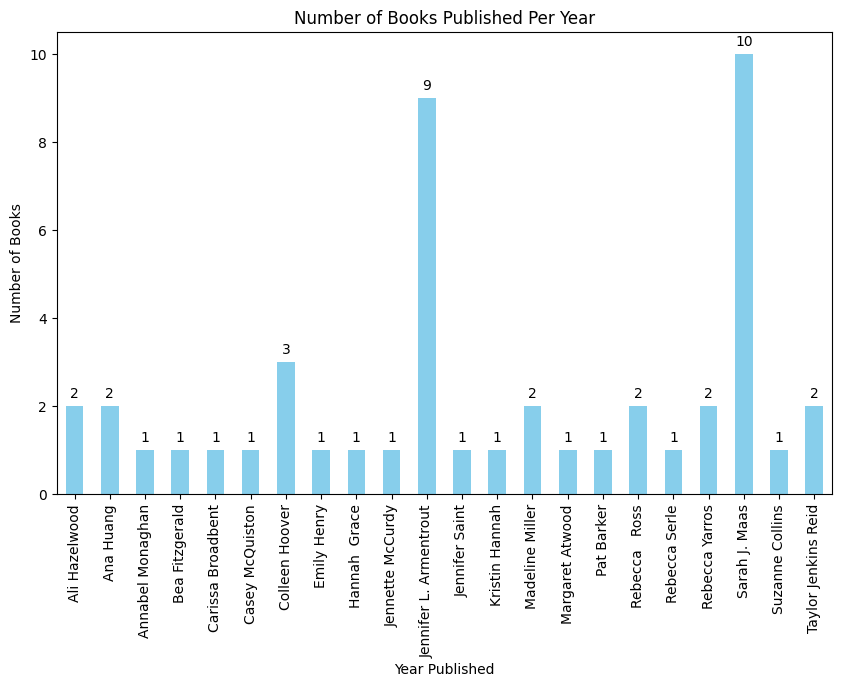

In [15]:
import matplotlib.pyplot as plt
books_per_author = df.groupby('Author').size()
# Plotting
plt.figure(figsize=(10, 6))
ax = books_per_author.plot(kind='bar', color='skyblue')


# Adding titles and labels
plt.title('Number of Books Published Per Year')
plt.xlabel('Year Published')
plt.ylabel('Number of Books')

# Add labels on top of the bars
for i, v in enumerate(books_per_author):
    ax.text(i, v + 0.2, str(v), color='black', ha='center')
# Show the plot
plt.show()

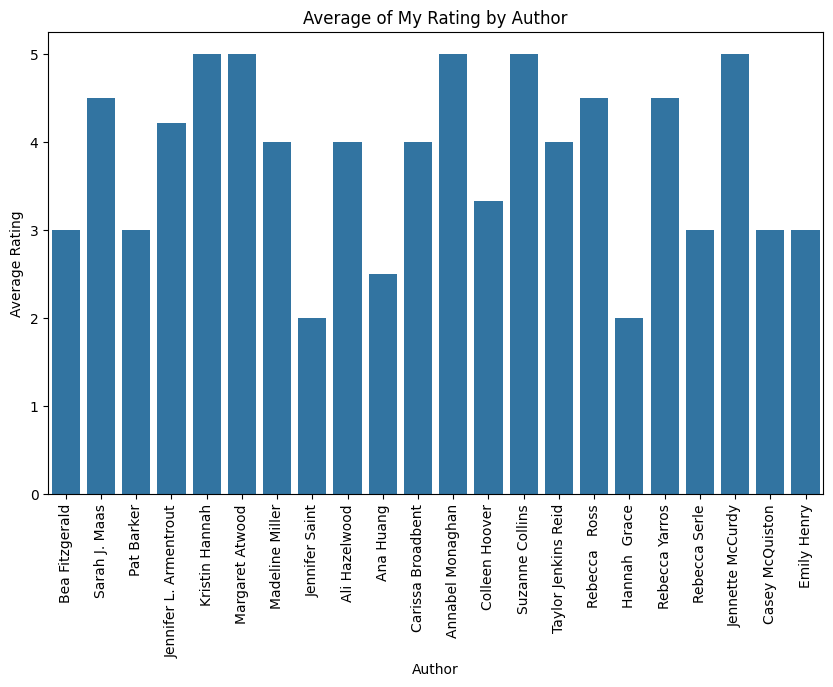

In [16]:

plt.figure(figsize=(10,6))
sns.barplot(x = df["Author"], y = df["Avg Rating by Author"])

# Rotate x-axis labels to be vertical
plt.xticks(rotation=90)
plt.title('Average of My Rating by Author')
plt.xlabel('Author')
plt.ylabel('Average Rating')

# Show the plot
plt.show()

In [17]:
#Filtered to look at authors where I have read more than 1 book beacuse it is better for ANOVA
from scipy.stats import f_oneway
# Filter out authors with only one book read
authors_with_multiple_books = df['Author'].value_counts()[df['Author'].value_counts() > 1].index
df_filtered = df[df['Author'].isin(authors_with_multiple_books)]

# Now perform ANOVA or other analyses on this filtered dataset
# Instead of using Avg Rating by Author, use the raw 'My Rating' for ANOVA
ratings_by_author = [df_filtered[df_filtered['Author'] == author]['My Rating'] for author in df_filtered['Author'].unique()]
f_stat, p_value = f_oneway(*ratings_by_author)
print(f'F-statistic: {f_stat}')
print(f'p-value: {p_value}')


F-statistic: 1.7929089443996782
p-value: 0.12619387066723575


MODELING

In [18]:
#OHE may not be best option because data is sparse and would lead to high dimensonitlty 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# One-hot encode the 'Author' column
df_OHE = pd.get_dummies(df, columns=['Author'], drop_first = True)
print(df_OHE.head())

      Book Id                                             Title  My Rating  \
2    63057457                              Girl, Goddess, Queen          3   
3    61756732             Queen of Shadows (Throne of Glass #4)          5   
18   41728452                          The Silence of the Girls          3   
20   76706470                Heir of Fire (Throne of Glass, #3)          4   
22  126062562  The Assassin's Blade (Throne of Glass, #0.1-0.5)          4   

    Average Rating  Number of Pages  Year Published  \
2             4.03              496            2024   
3             4.61              672            2023   
18            3.90              325            2019   
20            4.46              576            2023   
22            4.23              451            2023   

    Original Publication Year  Date Read Date Added               Bookshelves  \
2                        2023 2024-08-10 2024-06-24                greek-myth   
3                        2015 2024-08-

In [19]:
#Opting to do frequency encoding to reduce dimension but keep some of the importance
# Calculate the frequency of each author
author_frequencies = df['Author'].value_counts()
#print(author_frequencies)
# Map the frequencies back to the 'Author' column
df['Author_Freq_Encoded'] = df['Author'].map(author_frequencies)
# Display the DataFrame with Frequency Encoding
print(df.head())

      Book Id                                             Title  \
2    63057457                              Girl, Goddess, Queen   
3    61756732             Queen of Shadows (Throne of Glass #4)   
18   41728452                          The Silence of the Girls   
20   76706470                Heir of Fire (Throne of Glass, #3)   
22  126062562  The Assassin's Blade (Throne of Glass, #0.1-0.5)   

            Author  My Rating  Average Rating  Number of Pages  \
2   Bea Fitzgerald          3            4.03              496   
3    Sarah J. Maas          5            4.61              672   
18      Pat Barker          3            3.90              325   
20   Sarah J. Maas          4            4.46              576   
22   Sarah J. Maas          4            4.23              451   

    Year Published  Original Publication Year  Date Read Date Added  \
2             2024                       2023 2024-08-10 2024-06-24   
3             2023                       2015 2024-08-06 2

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#Split Data into Features (X) and Target (y)
X = df.loc[:, ["Average Rating","Number of Pages", "Year Published"]]
y = df["My Rating"]



#Split Data into Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#CHECKING TO SEE IF MULTICOL
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# Add a constant column for the intercept term
X_train_with_const = np.hstack([np.ones((X_train.shape[0], 1)), X_train])


In [31]:

# Calculate VIF for each feature
vif = [variance_inflation_factor(X_train_with_const, i) for i in range(X_train_with_const.shape[1])]

# Display VIF values
vif_df = pd.DataFrame({'Feature': ['Intercept'] + list(X_train.columns), 'VIF': vif})
print(vif_df)

           Feature            VIF
0        Intercept  627059.166658
1   Average Rating       1.388966
2  Number of Pages       1.518751
3   Year Published       1.113846


In [32]:

#SCALING DATA AND TRYING AGAIN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


#Initalize and train model
lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_:", lr.coef_) #getting the weights/coefs 
print("lf.intercept_:", lr.intercept_) #getting slope/intercept

lr.coef_: [ 0.55896909  0.02794859 -0.11644027]
lf.intercept_: 3.874999999999999


Holding all other features constant, for every one unit increase in Author_Freq_Encoded, My Rating is expected to increase by approximately 0.054.

A one-unit increase in Average Rating is associated with an increase of approximately 2.087 in My Rating, holding all other features constant. For every increase in Average Rating, there is about a 2.087 increase in My Rating.

A one-unit increase in Number of Pages is associated with a very small decrease in My Rating, specifically -0.00029, holding all other features constant. For every additional page in a book, my rating is associated with a 0.00029 decrease in My rating. 

A one-unit increase in Year Published is associated with a decrease of approximately 0.056 in My Rating, holding all other features constant. More recently published books are more likely to have a 0.056 decrease in My Rating. 

An intercept of [lf.intercept_: 108.67937779644288] is quite large considering the target variable 'My Rating' is out of 5 which means that I should try scaling my features. 

Holding all other features constant, for every one unit increase in Author_Freq_Encoded, My Rating is expected to increase by approximately0.21380765. For every additional book read for a certain author, My Rating is expected to increase by 0.21380765

A one-unit increase in Average Rating is associated with an increase of approximately 0.55998434 in My Rating, holding all other features constant. For every increase in Average Rating, there is about a 0.55998434 increase in My Rating.

A one-unit increase in Number of Pages is associated with a very small decrease in My Rating, specifically -0.043879, holding all other features constant. For every additional page in a book, my rating is associated with a 0.043879 decrease in My rating. 

A one-unit increase in Year Published is associated with a decrease of approximately -0.043879 in My Rating, holding all other features constant. More recently published books are more likely to have a 0.043879 decrease in My Rating. 

The intercept is much more normal after scaling the data. -0.043879

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
#print("A MSE of 0.89 incidcates that the model's predicitons are pretty close to the actual ratings.")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
# Print the R-squared value
print(f'R-squared: {r2}')

Mean Squared Error: 0.6407038916394722
R-squared: 0.25691558959339567


In [33]:
#TRYING LASSO
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('lasso', Lasso())  # Lasso regression
])

# Define the parameter grid
param_grid = {
    'lasso__alpha': [0.01, 0.1, 1, 10, 100]  # Adjust the range of alpha values as needed
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')  # Use negative MSE for scoring

# Fit GridSearchCV
grid_search.fit(X_train, y_train)
# Get the best parameters
best_alpha = grid_search.best_params_['lasso__alpha']
print(f'Best alpha: {best_alpha}')

# Evaluate the model with the best alpha
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Best alpha: 0.1
Mean Squared Error: 0.6686618404534034
R-squared: 0.2244901334947641


In [34]:
#Trying Random Forest to account for high dim and potential non linearity
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Initialize the Random Forest model
rf = RandomForestRegressor(n_estimators=250, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validated MSE: {-scores.mean()}")


# Feature importance
importances = rf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print(importance_df.sort_values(by='Importance', ascending=False))

#Might be performing worse because of the linear relationship between variables and the dataset is small and simple. 

Mean Squared Error: 0.8671637333333332
R-squared: -0.0057311340206183115
Cross-validated MSE: 1.0465679238095238
           Feature  Importance
0   Average Rating    0.607856
1  Number of Pages    0.264805
2   Year Published    0.127339


In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Linear Regression
lr = LinearRegression()
scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validated MSE: {-scores.mean()}")


NameError: name 'LinearRegression' is not defined